In [220]:
fn1 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_emi_isop_bio.nc'
fn2 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201207_emi_monot_bio.nc'

In [221]:
ds1 = xr.open_dataset(fn1)

In [222]:
ds2 = xr.open_dataset(fn2)

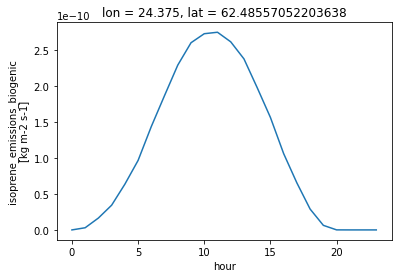

In [225]:
ds1['emi_isop_bio'].groupby(ds1['time.hour']).mean().sel(lat=61.85, lon = 24.28, method='nearest').plot()

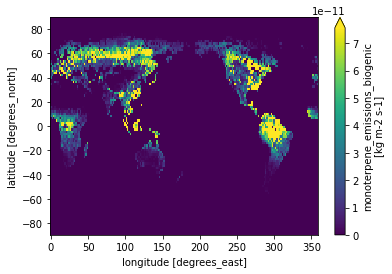

In [232]:
ds2['emi_monot_bio'].mean('time').plot(robust=True)

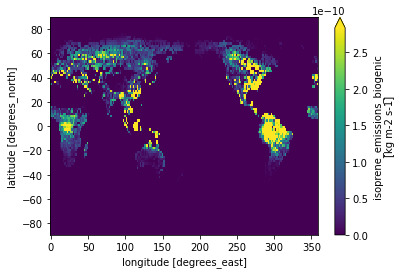

In [231]:
ds1['emi_isop_bio'].mean('time').plot(robust=True)

In [133]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [134]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [135]:
plot_path = Path('Plots')

In [136]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalOA_echam_{case}_{_type}.png'
    return plot_path /f

In [137]:
plot_path.mkdir(exist_ok=True, parents=True)

## EBAS OA timeseries:

In [138]:
    download_link= 'http://ebas-data.nilu.no/DataSets.aspx?stations=FI0050R&InstrumentTypes=aerosol_mass_spectrometer&fromDate=1970-01-01&toDate=2021-12-31'

## Read in model data. 

In [139]:
model_lev_i=-1

In [140]:
models = ['ECHAM-SALSA','NorESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

In [141]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
import numpy as np

In [144]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [145]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [146]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [147]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

## Settings:

In [148]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [149]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
from_time = '2012-01'
to_time = '2012-02'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

In [150]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-05-12 10:43:54,357 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-05-12 10:43:54,357 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


## Variables

In [151]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
] 

In [152]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [153]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-05-12 10:43:54,548 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [154]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [155]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [156]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [157]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [158]:
cases_noresm1 = ['OsloAero_intBVOC_f19_f19_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [159]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

## Variables

In [160]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [161]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [162]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [163]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-12 10:43:57,331 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [164]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-12 10:43:58,279 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [165]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [166]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [167]:
dic_ds = {case_mod: ds_comb}

In [168]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [169]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 24, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'ASP' 'BIR' 'PAL' 'PLA' ... 'JFJ' 'BEO' 'CMN'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (station, time) float32 dask.array<chunksize=(24, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(24, 26280, 32), meta=np.ndarray>

## SELECT STATION:


In [170]:
for mod in dic_mod_ca.keys():
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station='SMR')
        dic_mod_ca[mod][ca].load()

# Functions:

In [171]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

## ADJUST ECHAM

In [172]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [173]:
    from IPython import get_ipython

    # noinspection PyBroadException
    try:
        _ipython = get_ipython()
        _magic = _ipython.magic
        _magic('load_ext autoreload')
        _magic('autoreload 2')
    except:
        pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [175]:
standard_air_density = 100*pressure/(R*temperature)

In [176]:
import datetime

In [177]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [178]:
dic_mod_ca['ECHAM-SALSA'][case_name_echam]

<xarray.Dataset>
Dimensions:        (time: 61368, lev: 47)
Coordinates:
  * time           (time) datetime64[ns] 2012-01-01T00:52:30 ... 2018-12-31T2...
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0
    station        <U3 'SMR'
Data variables: (12/50)
    lon            (time) float64 24.29 24.29 24.29 24.29 ... 24.29 24.29 24.29
    APIN_gas       (time, lev) float32 1.177e-43 7.707e-44 ... 2.925e-11
    BPIN_gas       (time, lev) float32 1.471e-43 1.457e-43 ... 2.582e-11
    CARENE3_gas    (time, lev) float32 1.457e-43 1.275e-43 ... 1.743e-11
    ISOP_gas       (time, lev) float32 1.892e-43 1.906e-43 ... 1.207e-12
    LIMON_gas      (time, lev) float32 1.527e-43 1.261e-43 ... 1.649e-11
    ...             ...
    up_sw          (time) float32 84.92 84.92 83.1 83.1 ... 90.49 85.21 85.21
    up_sw_cs       (time) float32 35.67 35.67 35.73 35.73 ... 39.6 39.63 39.63
    up_sw_cs_noa   (time) float32 33.08 33.08 33.1 33.1 ... 38.38 38.27 38.27
    up_sw_noa      (time) float32 87.41 87.41 85.54 85.54 ... 93.68 88.35 88.35
    uw             (time, lev) float32 14.08 12.91 29.49 ... 5.39 2.139 0.3824
    vw             (time, lev) float32 7.55 10.76 19.63 ... 15.82 12.97 9.897

In [179]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], take_daily_median=False, model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp


,lon,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,SABIN_gas,SO2_gas,...,VBS10_gas_conc,OAG,cwp,T_C,month,isJuly,isAug,isSummer,lev,station
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 00:00:00,24.2896,3.710371e-10,3.257256e-10,2.213704e-10,5.536484e-12,2.085338e-10,4.707004e-11,2.548133e-09,5.339065e-11,1.135502e-09,...,0.047271,3.302720,450.210876,16.057159,7.0,1.0,0.0,1.0,47.0,SMR
2012-07-01 01:00:00,24.2896,1.150693e-10,9.966975e-11,6.716855e-11,4.439759e-11,6.369684e-11,1.450095e-11,2.709401e-09,1.674573e-11,1.107244e-09,...,0.048464,3.508380,325.151428,15.984772,7.0,1.0,0.0,1.0,47.0,SMR
2012-07-01 02:00:00,24.2896,8.298893e-11,6.772754e-11,4.516200e-11,1.574069e-10,4.320464e-11,1.037851e-11,2.654609e-09,1.225450e-11,1.041763e-09,...,0.044552,3.434252,234.170517,15.883209,7.0,1.0,0.0,1.0,47.0,SMR
2012-07-01 03:00:00,24.2896,7.747838e-11,5.944278e-11,3.958846e-11,2.695555e-10,3.791170e-11,9.682095e-12,2.537141e-09,1.145344e-11,9.517593e-10,...,0.042255,3.281988,123.506073,15.871674,7.0,1.0,0.0,1.0,47.0,SMR
2012-07-01 04:00:00,24.2896,8.330205e-11,5.064302e-11,3.374079e-11,7.155905e-10,3.230035e-11,1.040846e-11,2.404086e-09,1.231931e-11,7.917244e-10,...,0.039091,3.109234,32.326859,16.063202,7.0,1.0,0.0,1.0,47.0,SMR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,24.2896,1.809995e-10,1.590808e-10,1.054662e-10,2.040953e-11,1.014275e-10,2.253534e-11,7.502447e-10,2.685609e-11,8.465151e-11,...,0.077469,1.041631,441.303986,14.765564,8.0,0.0,1.0,1.0,47.0,SMR
2018-08-31 20:00:00,24.2896,2.172966e-10,1.910272e-10,1.266119e-10,2.113281e-11,1.217971e-10,2.704862e-11,7.212939e-10,3.218887e-11,9.280469e-11,...,0.069346,0.995715,472.295288,14.573303,8.0,0.0,1.0,1.0,47.0,SMR
2018-08-31 21:00:00,24.2896,2.536518e-10,2.230169e-10,1.478677e-10,2.163391e-11,1.421878e-10,3.158122e-11,6.953416e-10,3.758045e-11,9.917914e-11,...,0.061076,0.953468,492.546448,14.383453,8.0,0.0,1.0,1.0,47.0,SMR


In [180]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### NorESM

In [181]:
dic_mod_ca['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp']

<xarray.Dataset>
Dimensions:     (time: 61345, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station     <U3 'SMR'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BC_A        (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC       (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI       (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX       (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N        (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...          ...
    SS_A1       (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2       (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.57e-10
    SS_A3       (time, lev) float32 2.502e-29 1.686e-28 ... 1.476e-10 3.875e-10
    T           (time, lev) float32 213.2 208.2 193.4 ... 271.5 272.4 273.3
    isoprene    (time, lev) float32 4.226e-37 4.236e-37 ... 1.243e-14 1.566e-14
    monoterp    (time, lev) float32 1.769e-37 1.82e-37 ... 1.786e-12 4.409e-12

In [182]:
index = dic_mod_ca['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp'].to_dataframe().index#.get_level_values(0).name

In [183]:
index

MultiIndex([('2012-01-02 00:00:00',   3.64346569404006),
            ('2012-01-02 00:00:00',  7.594819646328688),
            ('2012-01-02 00:00:00', 14.356632251292467),
            ('2012-01-02 00:00:00', 24.612220004200935),
            ('2012-01-02 00:00:00',  35.92325001955032),
            ('2012-01-02 00:00:00',   43.1937500834465),
            ('2012-01-02 00:00:00',  51.67749896645546),
            ('2012-01-02 00:00:00',  61.52049824595451),
            ('2012-01-02 00:00:00',  73.75095784664154),
            ('2012-01-02 00:00:00',  87.82123029232025),
            ...
            ('2019-01-01 00:00:00',  691.3894303143024),
            ('2019-01-01 00:00:00',   763.404481112957),
            ('2019-01-01 00:00:00',  820.8583686500788),
            ('2019-01-01 00:00:00',  859.5347665250301),
            ('2019-01-01 00:00:00',  887.0202489197254),
            ('2019-01-01 00:00:00',   912.644546944648),
            ('2019-01-01 00:00:00',  936.1983984708786),
            ('2

In [184]:
model_lev_i

-1

In [185]:
dic_mod_ca['NorESM']

{'OsloAero_intBVOC_f19_f19_mg17_fssp': <xarray.Dataset>
 Dimensions:     (time: 61345, lev: 32)
 Coordinates:
   * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
     station     <U3 'SMR'
   * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
 Data variables: (12/39)
     ACTREL      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     BC_A        (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
     BC_AC       (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
     BC_AI       (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
     BC_AX       (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
     BC_N        (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
     ...          ...
     SS_A1       (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
     SS_A2       (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.57e-10
     SS_A3       (time, lev) fl

In [186]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], model_lev_i=model_lev_i, 
                                            return_summer_median=True, take_daily_median=False)


dic_df_mod_case['NorESM'] = dic_df.copy()
dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

H)EWH)UIOEQWNOWQFEFDA
H)EWH)UIOEQWNOWQFEFDA
H)EWH)UIOEQWNOWQFEFDA
H)EWH)UIOEQWNOWQFEFDA
hey
<xarray.Dataset>
Dimensions:     (time: 61345, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station     <U3 'SMR'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BC_A        (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC       (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI       (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX       (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N        (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...          ...
    SS_A1       (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2       (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.

## SHIFT TIME:

In [187]:
import datetime

In [188]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=3)

In [189]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-07-01 03:00:00', '2012-07-01 04:00:00',
               '2012-07-01 05:00:00', '2012-07-01 06:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-07-01 03:00:00', '2012-07-01 04:00:00',
               '2012-07-01 05:00:00', '2012-07-01 06:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Copy base case 

In [190]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

## Settings:

In [191]:
from bs_fdbck.constants import path_measurement_data
import pandas as pd

In [192]:
    
def timeround10(dt):
    a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(hours = (dt.hour+a), minutes=b)
    nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year,dt.month, dt.day,) + tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt



def fix_matlabtime(t):
    ind = pd.to_datetime(t-719529, unit='D')
    ind_s = pd.Series(ind)
    return ind_s.apply(timeround10)
    
    


In [193]:
fn_liine = path_measurement_data / 'ACSM_DEFAULT.mat'

In [194]:
columns = ['time', 'Org','SO4','NO3','NH4','Chl']

<AxesSubplot:xlabel='time'>

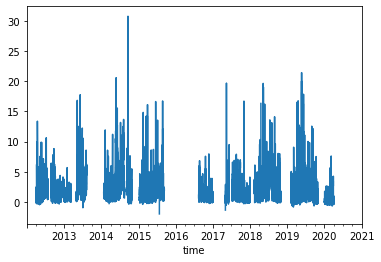

In [195]:
import scipy.io as sio
test = sio.loadmat(fn_liine)

df_lii = pd.DataFrame(test['ACSM_DEFAULT'], columns=columns)#.set_index('time')

df_lii['time'] = fix_matlabtime(df_lii['time']) + datetime.timedelta(hours=1)

df_lii = df_lii.set_index('time')

df_lii['Org'].plot()

In [196]:
len(df_lii['Org'][df_lii['Org']<0])#.plot()

723

In [197]:
obs_hyy_s = df_lii[(df_lii.index.month==7) |(df_lii.index.month==8)]

### mask anomaly

## Set uo dic with all OA values from models

In [198]:
dic_mod_oa = dict()
#dic_mod_soa = dict()
dic_mod_all = dict()


for mod in models:
    dic_mod_oa[mod] = dict()
    #dic_mod_soa[mod] = dict()
    dic_mod_all[mod] = dict()
    for ca in di_mod2cases[mod]:
        dic_mod_oa[mod][ca] = dict()
        #dic_mod_soa[mod][ca] = dict()
        dic_mod_all[mod][ca] = dict()
    
    
for mo in models:
    print(mo)
    for ca in di_mod2cases[mo]:
        print(ca)
        _df = dic_df_mod_case[mo][ca]
        dic_mod_oa[mo][ca] =_df['OA']
        #dic_mod_soa[mo][ca][i] =_df['SOA']
        dic_mod_all[mo][ca] =_df
    



ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f19_f19_mg17_fssp


(390048.0, 390792.0)

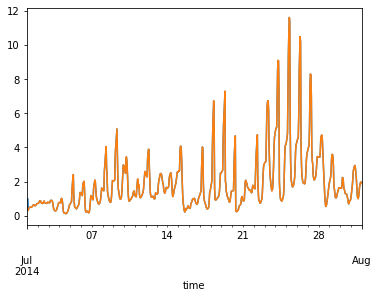

In [199]:
dic_df_pre['ECHAM-SALSA']['SALSA_BSOA_feedback'].resample('h').ffill()['OA'].plot()         
dic_df_pre['ECHAM-SALSA']['SALSA_BSOA_feedback']['OA'].plot()
plt.xlim(['2014-07','2014-08'])

## Merge with observations:

In [200]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        df_mod = dic_df_pre[mod][ca].resample('h').ffill()
        _df_merged = pd.merge(df_mod, obs_hyy_s, right_on='time', left_on='time')
        _df_merged['year'] = _df_merged.index.year
        dic_df_mod_case[mod][ca]= _df_merged

ECHAM-SALSA
NorESM


In [201]:
dic_df_mod_case['ECHAM-SALSA']['SALSA_BSOA_feedback']#['OA']

,lon,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,SABIN_gas,SO2_gas,...,isAug,isSummer,lev,station,Org,SO4,NO3,NH4,Chl,year
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 03:00:00,24.2896,3.710371e-10,3.257256e-10,2.213704e-10,5.536484e-12,2.085338e-10,4.707004e-11,2.548133e-09,5.339065e-11,1.135502e-09,...,0.0,1.0,47.0,SMR,4.110489,0.348362,0.511847,NaN,NaN,2012
2012-07-01 04:00:00,24.2896,1.150693e-10,9.966975e-11,6.716855e-11,4.439759e-11,6.369684e-11,1.450095e-11,2.709401e-09,1.674573e-11,1.107244e-09,...,0.0,1.0,47.0,SMR,3.887238,0.385370,0.616664,NaN,NaN,2012
2012-07-01 05:00:00,24.2896,8.298893e-11,6.772754e-11,4.516200e-11,1.574069e-10,4.320464e-11,1.037851e-11,2.654609e-09,1.225450e-11,1.041763e-09,...,0.0,1.0,47.0,SMR,3.817846,0.367391,0.623363,NaN,NaN,2012
2012-07-01 06:00:00,24.2896,7.747838e-11,5.944278e-11,3.958846e-11,2.695555e-10,3.791170e-11,9.682095e-12,2.537141e-09,1.145344e-11,9.517593e-10,...,0.0,1.0,47.0,SMR,3.631426,0.455191,0.685897,NaN,NaN,2012
2012-07-01 07:00:00,24.2896,8.330205e-11,5.064302e-11,3.374079e-11,7.155905e-10,3.230035e-11,1.040846e-11,2.404086e-09,1.231931e-11,7.917244e-10,...,0.0,1.0,47.0,SMR,3.658771,0.572244,0.614392,NaN,NaN,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,24.2896,3.531877e-11,3.003247e-11,1.987865e-11,5.732534e-11,1.913727e-11,4.393025e-12,7.691839e-10,5.266769e-12,4.928790e-11,...,1.0,1.0,47.0,SMR,2.366821,0.216743,0.118522,0.165808,0.015068,2018
2018-08-31 20:00:00,24.2896,8.135911e-11,7.128508e-11,4.719816e-11,2.508008e-11,4.541788e-11,1.012616e-11,7.963245e-10,1.213859e-11,6.257708e-11,...,1.0,1.0,47.0,SMR,2.514625,0.256356,0.094490,0.293094,0.014430,2018
2018-08-31 21:00:00,24.2896,1.400227e-10,1.230089e-10,8.154408e-11,2.031158e-11,7.841366e-11,1.743565e-11,7.864092e-10,2.081859e-11,7.494193e-11,...,1.0,1.0,47.0,SMR,2.328126,0.221023,0.126077,0.265872,-0.007015,2018


In [202]:
mask_obs_OA = dic_df_mod_case[mod][ca]['Org'].notnull()

In [203]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        df_mod = dic_df_pre[mod][ca].resample('h').mean()
        _df_merged = pd.merge(df_mod, obs_hyy_s, right_on='time', left_on='time')
        _df_merged['year'] = _df_merged.index.year
        dic_df_mod_case[mod][ca]= _df_merged

ECHAM-SALSA
NorESM


In [204]:
mask_obs_OA = dic_df_mod_case[mod][ca]['Org'].notnull()

In [205]:
_df = obs_hyy_s['Org'].rename('Obs')

df_OA_all = pd.DataFrame(_df)
df_OAG_all = pd.DataFrame(_df)

for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        if len(dic_df_mod_case[mod].keys())==1:
            use_name = mod
        else: 
            use_name = f'{mod}: {ca}'
        df_OA_all[use_name] = dic_df_mod_case[mod][ca]['OA']
        df_OAG_all[use_name] = dic_df_mod_case[mod][ca]['OAG']


df_OA_all = df_OA_all[df_OA_all[mod].notna()]
df_OA_all = df_OA_all[df_OA_all['Obs'].notna()]
df_OAG_all = df_OAG_all[df_OAG_all[mod].notna()]
df_OAG_all = df_OAG_all[df_OAG_all['Obs'].notna()]

ECHAM-SALSA
NorESM


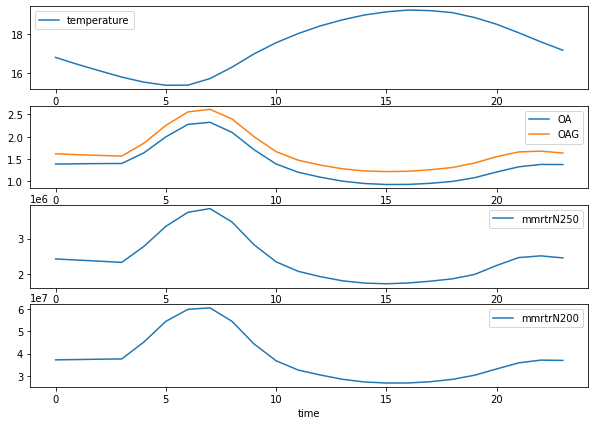

In [206]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(4, figsize=[10,7])
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
_df['OAG'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OAG')
_df['mmrtrN500'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='mmrtrN250')
_df['mmrtrN200'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='mmrtrN200')
#_df['MYRC_gas'
for ax in axs:
    ax.legend()

In [207]:
_df['OAG'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')

<AxesSubplot:xlabel='time'>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


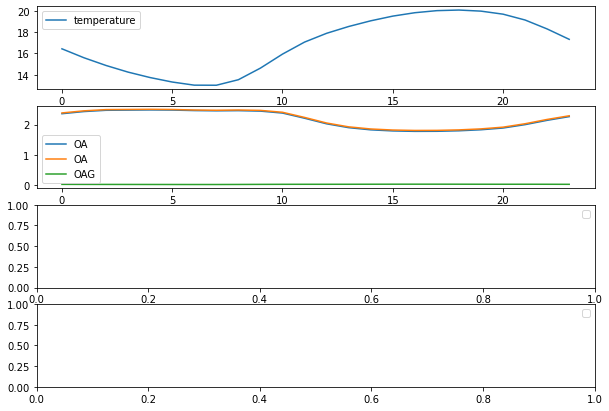

In [208]:
mo = 'NorESM'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(4, figsize=[10,7])
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
_df['OAG'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
_df['SOA_SV'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OAG')
#_df['VBS0_gas'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='b-pinen')
#_df['VBS10_gas'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='VBS10')
#_df['MYRC_gas'
for ax in axs:
    ax.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


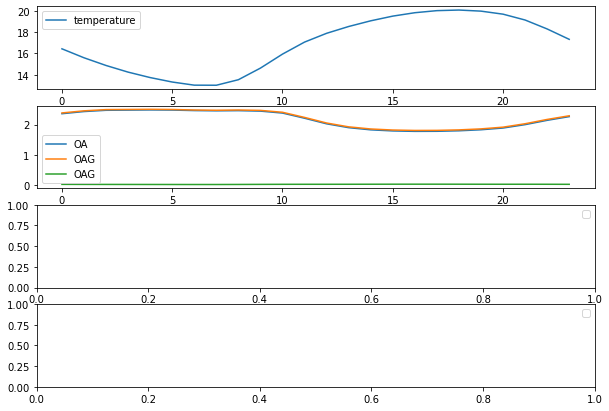

In [209]:
mo = 'NorESM'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(4, figsize=[10,7])
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
_df['OAG'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OAG')
_df['SOA_SV'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OAG')
#_df['VBS0_gas'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='b-pinen')
#_df['VBS10_gas'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='VBS10')
#_df['MYRC_gas'
for ax in axs:
    ax.legend()

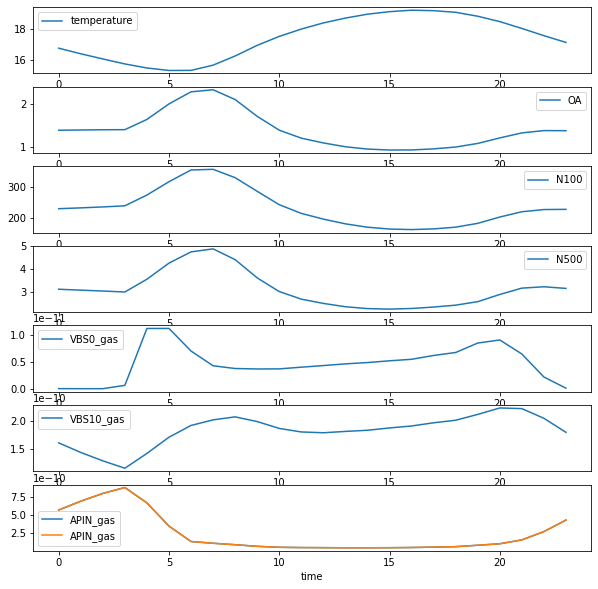

In [210]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(7, figsize=[10,10])
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
_df['N100'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='N100')
_df['N500'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='N500')
_df['VBS10_gas'].groupby(_df.index.hour).mean().plot(ax = axs[5], label='VBS10_gas')
_df['VBS0_gas'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='VBS0_gas')
_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[6], label='APIN_gas')
_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[6], label='APIN_gas')

#_df['MYRC_gas'
for ax in axs:
    ax.legend()

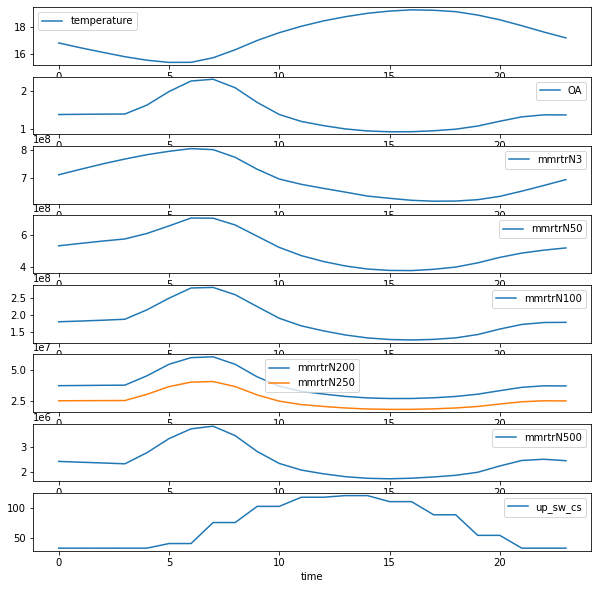

In [211]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(8, figsize=[10,10])
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
_df['mmrtrN3'].groupby(_df.index.hour).mean().plot(ax = axs[2], )#label='N100')
_df['mmrtrN50'].groupby(_df.index.hour).mean().plot(ax = axs[3], )#label='N100')
_df['mmrtrN100'].groupby(_df.index.hour).mean().plot(ax = axs[4],)# label='N500')
_df['mmrtrN200'].groupby(_df.index.hour).mean().plot(ax = axs[5], )#label='mmrtrN3')
_df['mmrtrN250'].groupby(_df.index.hour).mean().plot(ax = axs[5], )#label='VBS0_gas')
_df['mmrtrN500'].groupby(_df.index.hour).mean().plot(ax = axs[6],)# label='mmrtrN500')
_df['up_sw_cs'].groupby(_df.index.hour).mean().plot(ax = axs[7],)# label='mmrtrN500')

#_df['MYRC_gas'
for ax in axs:
    ax.legend()

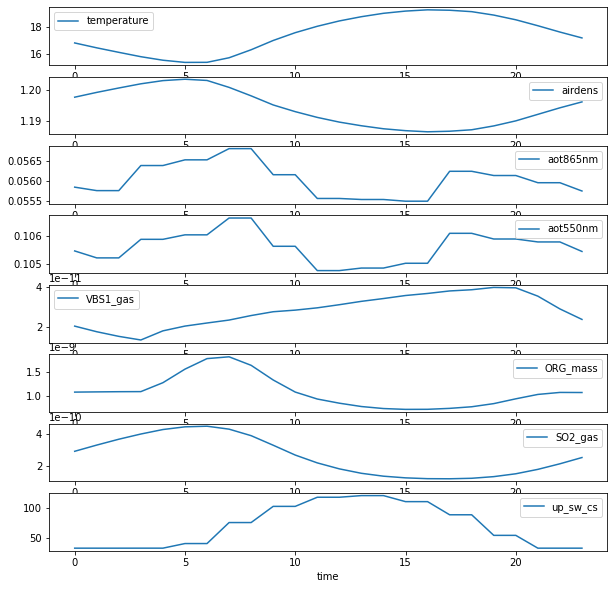

In [212]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(8, figsize=[10,10])
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
_df['airdens'].groupby(_df.index.hour).mean().plot(ax = axs[1],)# label='OA')
_df['aot865nm'].groupby(_df.index.hour).mean().plot(ax = axs[2], )#label='N100')
_df['aot550nm'].groupby(_df.index.hour).mean().plot(ax = axs[3], )#label='N100')
_df['VBS1_gas'].groupby(_df.index.hour).mean().plot(ax = axs[4],)# label='N500')
_df['ORG_mass'].groupby(_df.index.hour).mean().plot(ax = axs[5], )#label='mmrtrN3')
#_df['mmrtrN250'].groupby(_df.index.hour).mean().plot(ax = axs[5], )#label='VBS0_gas')
_df['SO2_gas'].groupby(_df.index.hour).mean().plot(ax = axs[6],)# label='mmrtrN500')
_df['up_sw_cs'].groupby(_df.index.hour).mean().plot(ax = axs[7],)# label='mmrtrN500')

#_df['MYRC_gas'
for ax in axs:
    ax.legend()

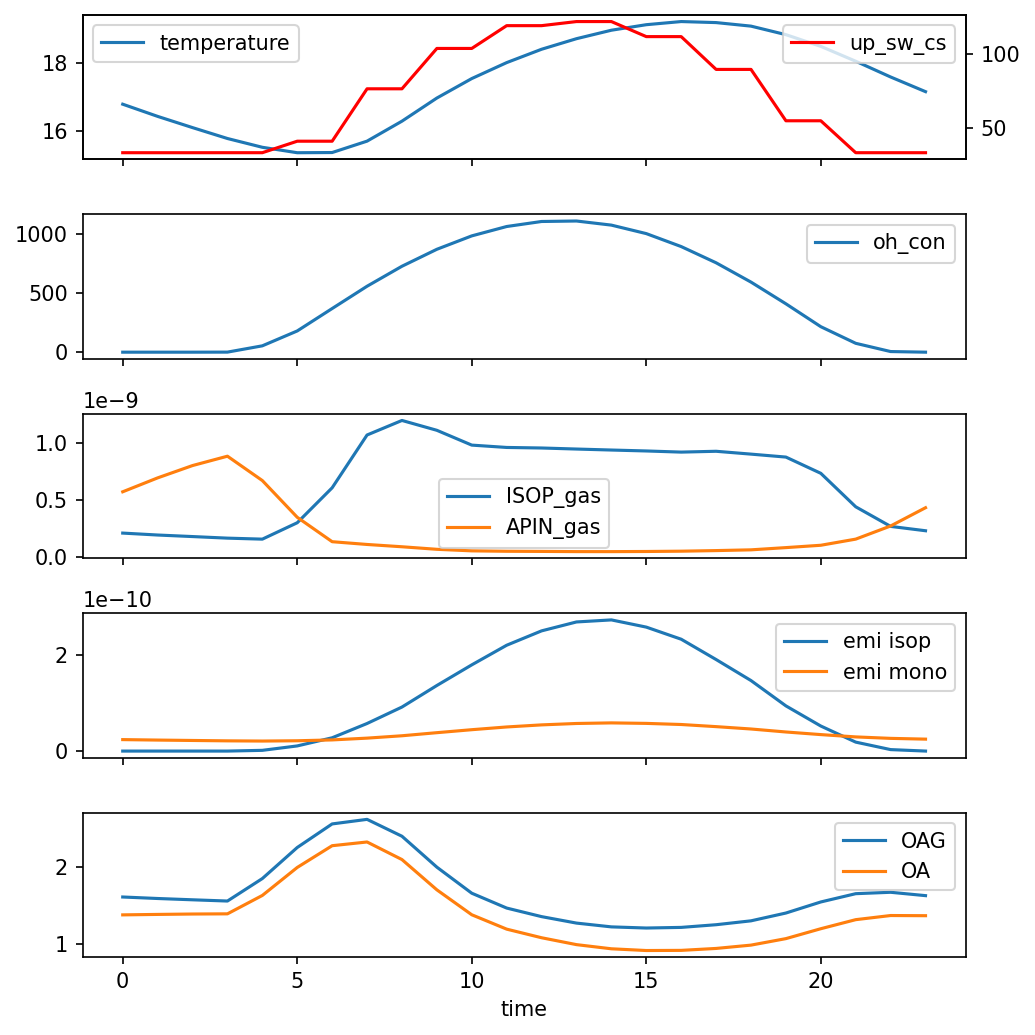

In [213]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(5, figsize=[7,7], sharex=True, dpi=150)
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
ax = axs[0].twinx()
_df['up_sw_cs'].groupby(_df.index.hour).mean().plot(ax = ax, label='up_sw_cs', c='r')
ax.legend()

#_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='OA')
#_df['VBS0_gas'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='VBS0')
#_df['VBS1_gas'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='VBS1')
#_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='APIN')
_df['ISOP_gas'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='ISOP_gas')
_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='APIN_gas')
#_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='APIN_gas')
_df['oh_con'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='oh_con')
#_df['emi_monot_bio'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='emi monot')
_df['emi_isop_bio'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='emi isop')
_df['emi_monot_bio'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='emi mono')
_df['OAG'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='OAG')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='OA')
for ax in axs:
    ax.legend()
    
fig.tight_layout()

In [214]:
ds

<xarray.Dataset>
Dimensions:     (time: 35065, station: 24, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2015-01-01 ... 2019-01-01
  * station     (station) object 'ASP' 'BIR' 'PAL' 'PLA' ... 'JFJ' 'BEO' 'CMN'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (station, time) float32 dask.array<chunksize=(24, 35065), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>

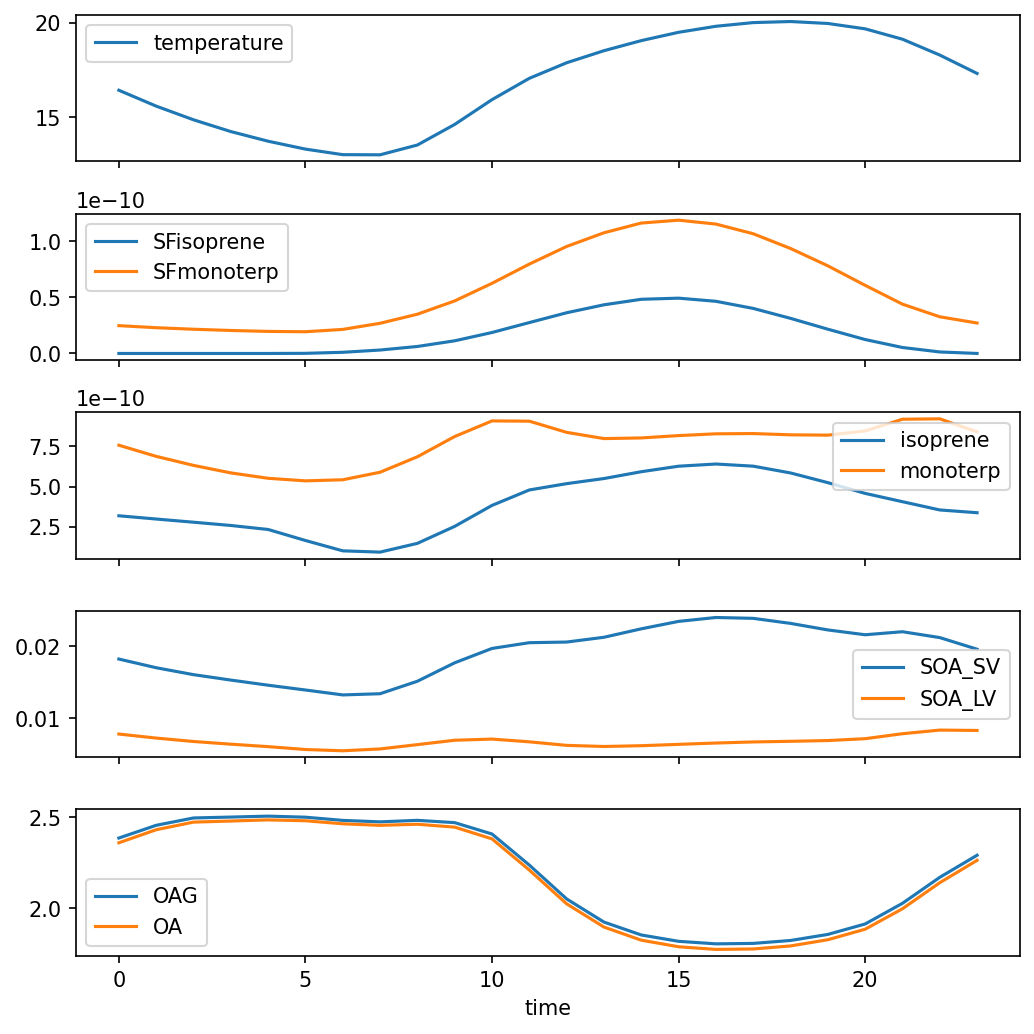

In [216]:
mo = 'NorESM'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]

fig, axs = plt.subplots(5, figsize=[7,7], sharex=True, dpi=150)
(_df['T']-273.15).groupby(_df.index.hour).mean().plot(ax =axs[0], label='temperature')
#ax = axs[0].twinx()
#_df['up_sw_cs'].groupby(_df.index.hour).mean().plot(ax = ax, label='up_sw_cs', c='r')
#ax.legend()

_df['SFisoprene'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='SFisoprene')
_df['SFmonoterp'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='SFmonoterp')
#_df['VBS0_gas'].groupby(_df.index.hour).mean().plot(ax = axs[2], label='VBS0')
#_df['VBS1_gas'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='VBS1')
#_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='APIN')
(_df['isoprene']*128./28).groupby(_df.index.hour).mean().plot(ax = axs[2], label='isoprene')
(_df['monoterp']*128./28).groupby(_df.index.hour).mean().plot(ax = axs[2], label='monoterp')
#_df['APIN_gas'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='APIN_gas')
#_df['oh_con'].groupby(_df.index.hour).mean().plot(ax = axs[1], label='oh_con')
_df['SOA_SV'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='SOA_SV')
_df['SOA_LV'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='SOA_LV')
#_df['emi_isop_bio'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='emi isop')
#_df['emi_monot_bio'].groupby(_df.index.hour).mean().plot(ax = axs[3], label='emi mono')
_df['OAG'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='OAG')
_df['OA'].groupby(_df.index.hour).mean().plot(ax = axs[4], label='OA')
for ax in axs:
    ax.legend()
    
fig.tight_layout()

In [126]:
_df_daily = _df - _df.resample('D').mean().resample('h').ffill()

KeyError: 'VBS0_gas'

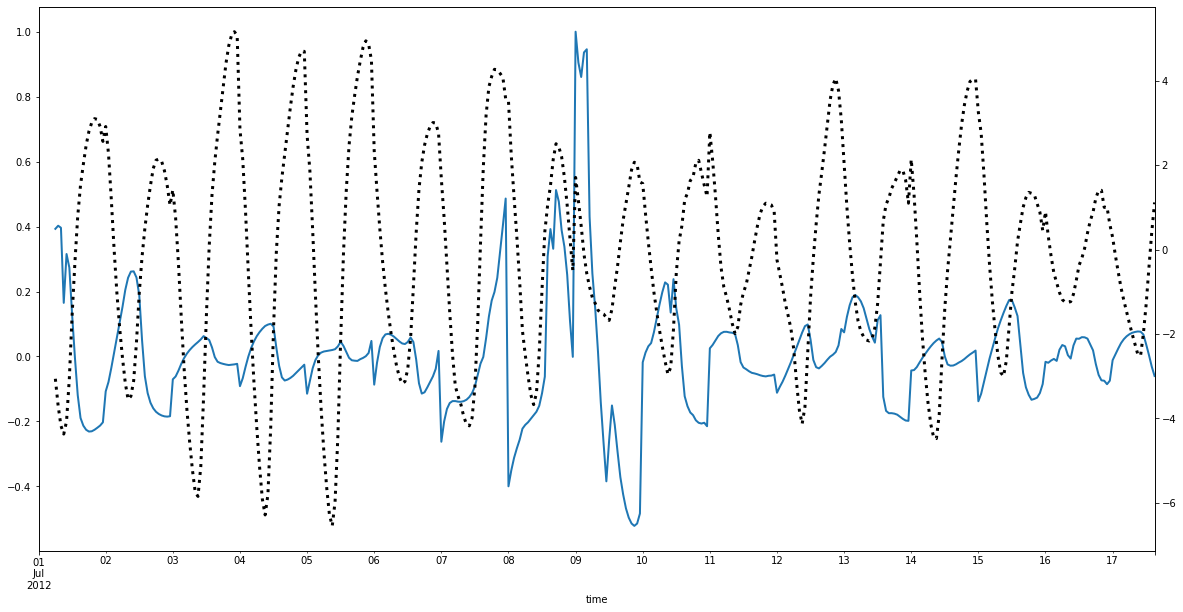

In [127]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]
n = 400
fig, ax = plt.subplots(1, figsize=[20,10])
ax2 = ax.twinx()
(_df_daily['T']).iloc[0:n].plot(ax = ax2, label='T_C', c='k', linestyle=':', linewidth=3)
(_df_daily['OA'].iloc[0:n]/_df_daily['OA'].iloc[0:n].max()).plot(ax = ax, label='OA', linewidth=2)
(_df_daily['VBS0_gas'].iloc[0:n]/_df_daily['VBS0_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS0',linewidth=2)
#(_df['VBS1_gas'].iloc[0:n]/_df['VBS1_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS1')
#(_df['VBS10_gas'].iloc[0:n]/_df['VBS10_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS10')
ax.legend()

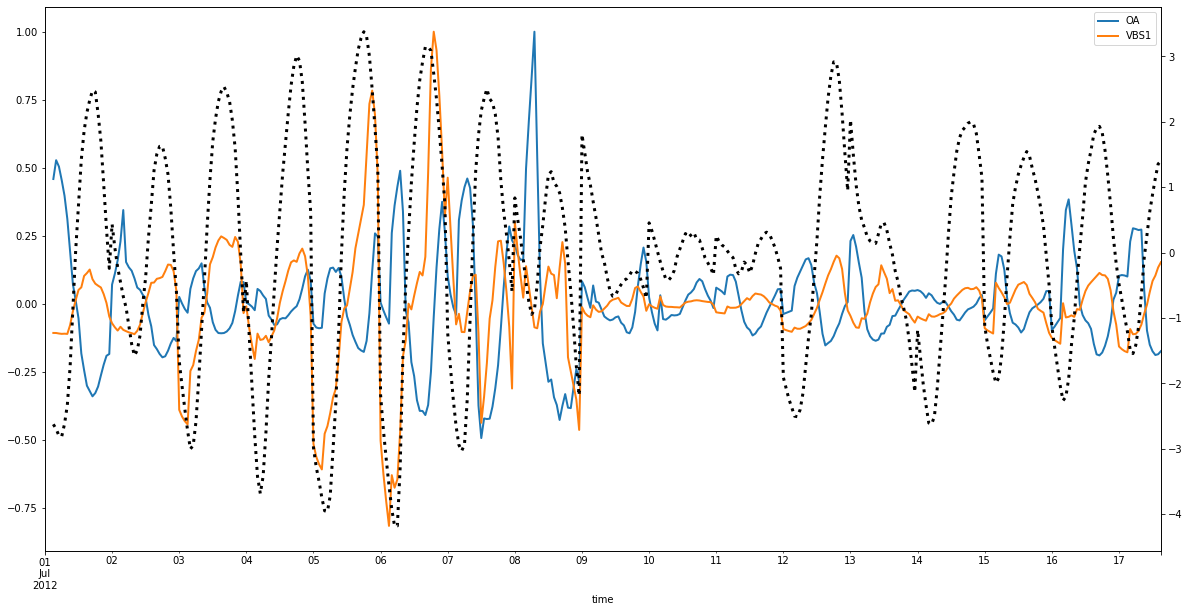

In [126]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]
n = 400
fig, ax = plt.subplots(1, figsize=[20,10])
ax2 = ax.twinx()
(_df_daily['T']).iloc[0:n].plot(ax = ax2, label='T_C', c='k', linestyle=':', linewidth=3)
(_df_daily['OA'].iloc[0:n]/_df_daily['OA'].iloc[0:n].max()).plot(ax = ax, label='OA', linewidth=2)
(_df_daily['VBS1_gas'].iloc[0:n]/_df_daily['VBS1_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS1',linewidth=2)
#(_df['VBS1_gas'].iloc[0:n]/_df['VBS1_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS1')
#(_df['VBS10_gas'].iloc[0:n]/_df['VBS10_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS10')
ax.legend()

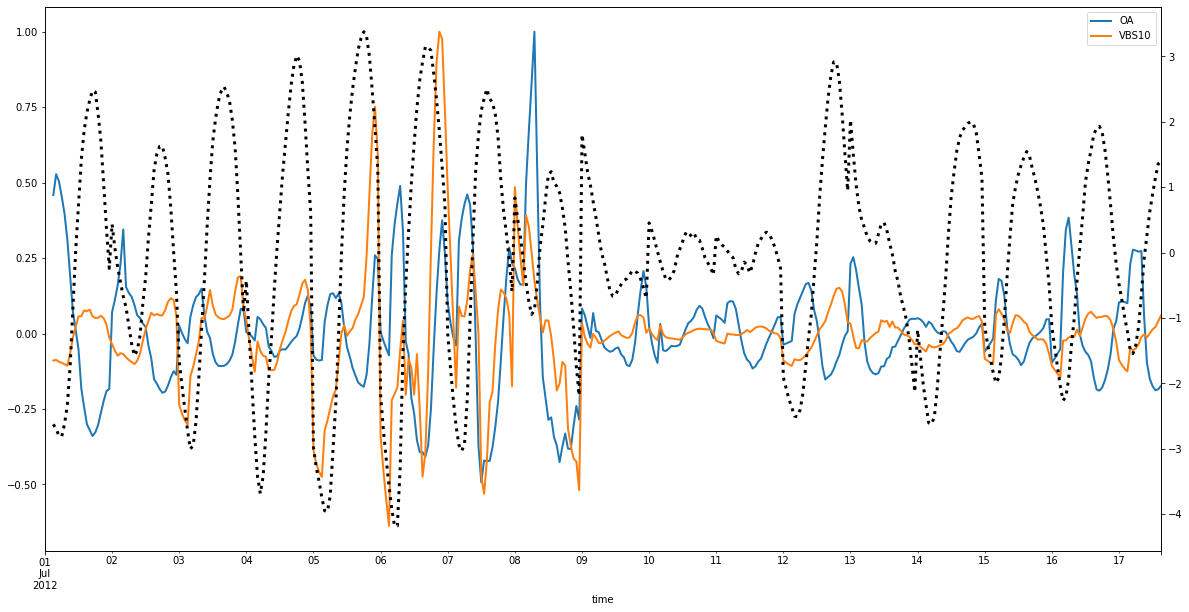

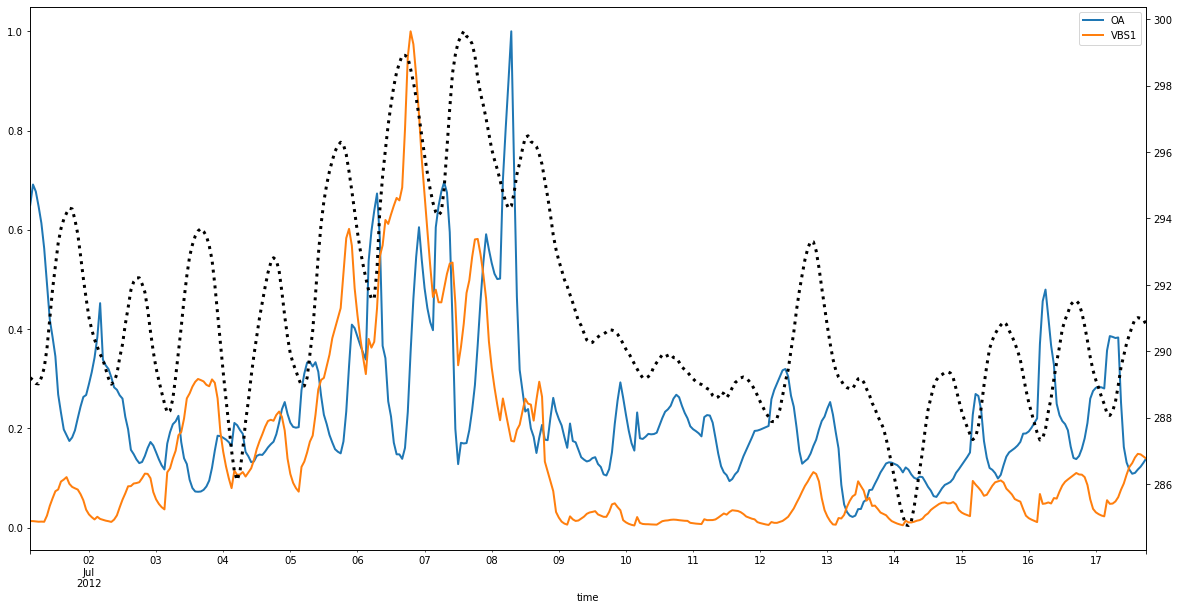

In [127]:
mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]
n = 400
fig, ax = plt.subplots(1, figsize=[20,10])
ax2 = ax.twinx()
(_df_daily['T']).iloc[0:n].plot(ax = ax2, label='T_C', c='k', linestyle=':', linewidth=3)
(_df_daily['OA'].iloc[0:n]/_df_daily['OA'].iloc[0:n].max()).plot(ax = ax, label='OA', linewidth=2)
(_df_daily['VBS10_gas'].iloc[0:n]/_df_daily['VBS10_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS10',linewidth=2)
#(_df['VBS1_gas'].iloc[0:n]/_df['VBS1_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS1')
#(_df['VBS10_gas'].iloc[0:n]/_df['VBS10_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS10')
ax.legend()
plt.show()

mo = 'ECHAM-SALSA'
_df = dic_df_mod_case[mo][di_mod2cases[mo][0]]
n = 400
fig, ax = plt.subplots(1, figsize=[20,10])
ax2 = ax.twinx()
(_df['T']).iloc[0:n].plot(ax = ax2, label='T_C', c='k', linestyle=':', linewidth=3)
(_df['OA'].iloc[0:n]/_df['OA'].iloc[0:n].max()).plot(ax = ax, label='OA',linewidth=2)
#(_df['VBS0_gas'].iloc[0:n]/_df['VBS0_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS0')
(_df['VBS1_gas'].iloc[0:n]/_df['VBS1_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS1',linewidth=2)
#(_df['VBS10_gas'].iloc[0:n]/_df['VBS10_gas'].iloc[0:n].max()).plot(ax = ax, label='VBS10')
ax.legend()
plt.show()

In [129]:
for v in _df.columns:
    if True:#'VBS' in v:
        print(v)

ACTREL
BC_A
BC_AC
BC_AI
BC_AX
BC_N
BC_NI
COAGNUCL
DOD440
DOD500
DST_A2
DST_A3
FORMRATE
H2SO4
N100
N150
N200
N50
NCONC01
OM_AC
OM_AI
OM_NI
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
SOA_A1
SOA_LV
SOA_NA
SOA_SV
SS_A1
SS_A2
SS_A3
T
isoprene
monoterp
rho
T_C
SOA
OAG
OA
POA
SO4_x
hour
month
isJuly
isAug
isSummer
lev
year
Org
SO4_y
NO3
NH4
Chl


Small error due to time change in models but only 3 data points each summer. 


In [129]:
orgname={'NorESM' : 'OA',
         'ECHAM-SALSA': 'OA'}

### Calculate anomaly from daily average

In [130]:
df_anom_OA = df_OA_all-df_OA_all.resample('D').mean().resample('h').ffill()
df_anom_OAG = df_OAG_all-df_OAG_all.resample('D').mean().resample('h').ffill()

In [131]:
linestyle_dic = {
    'Obs': '--',
    'NorESM':'dashdot',
    'ECHAM-SALSA':'-.'
}

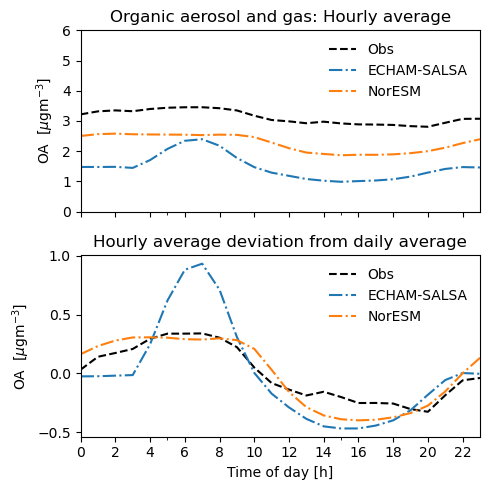

In [133]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')

for mod in df_anom_OA.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_anom_OA[mod].groupby(df_anom_OA.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title("$OA'$: Average diurnal anomaly") 
#ax.legend(frameon=False)


ax = axs[0]


for mod in df_anom_OA.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_OA_all[mod].groupby(df_OA_all.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("Organic aerosol and gas: Hourly average") 

ax.set_ylim([0,6])

ax = axs[1]
#hour = df_anom_OA[case_mod].index.hour
#anom = df_anom_OA[case_mod].groupby(hour).mean()
#hour = df_daily_mean[case_mod].index.hour
#daily = df_daily_mean[case_mod].groupby(hour).mean()
#nn = 2.74*daily + 1.86*anom
#nn.plot(label = "OsloAeroSec fit: \n  $y=2.74 \cdot \overline{OA}+ 1.86 \cdot OA'$       ")
#pl_obs = df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='__nolegend__', c='k')
ax.set_title("Hourly average deviation from daily average") 

plt.legend(frameon=False)
ax.set_xlabel('Time of day [h]')
for ax in axs: 
    ax.set_ylabel('OA  [$\mu$gm$^{-3}$]')
plt.tight_layout()

ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])
fn = make_fn_eval('_'.join(models), 'diurnal_mean')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

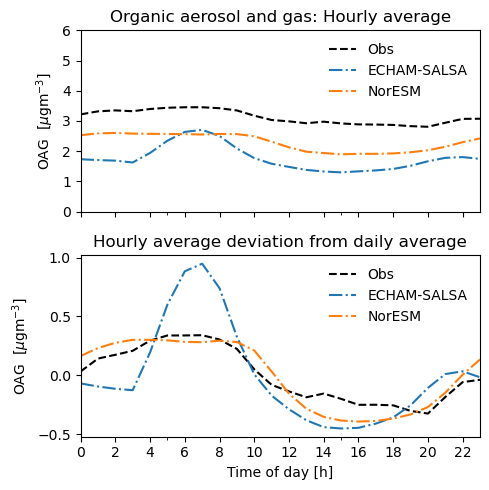

In [134]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')

for mod in df_anom_OAG.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_anom_OAG[mod].groupby(df_anom_OAG.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title("$OA'$: Average diurnal anomaly") 
#ax.legend(frameon=False)


ax = axs[0]


for mod in df_OAG_all.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_OAG_all[mod].groupby(df_OAG_all.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("Organic aerosol and gas: Hourly average") 
ax.set_ylim([0,6])

ax = axs[1]
#hour = df_anom_OA[case_mod].index.hour
#anom = df_anom_OA[case_mod].groupby(hour).mean()
#hour = df_daily_mean[case_mod].index.hour
#daily = df_daily_mean[case_mod].groupby(hour).mean()
#nn = 2.74*daily + 1.86*anom
#nn.plot(label = "OsloAeroSec fit: \n  $y=2.74 \cdot \overline{OA}+ 1.86 \cdot OA'$       ")
#pl_obs = df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='__nolegend__', c='k')
ax.set_title("Hourly average deviation from daily average") 

plt.legend(frameon=False)
ax.set_xlabel('Time of day [h]')
for ax in axs: 
    ax.set_ylabel('OAG  [$\mu$gm$^{-3}$]')
plt.tight_layout()

ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])
fn = make_fn_eval('_'.join(models), 'diurnal_mean')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

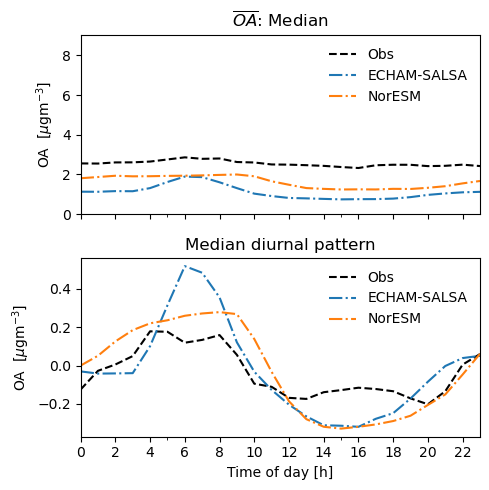

In [1147]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')

for mod in df_anom_OA.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_anom_OA[mod].groupby(df_anom_OA.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title("$OA'$: Median diurnal anomaly") 
#ax.legend(frameon=False)


ax = axs[0]


for mod in df_anom_OA.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_OA_all[mod].groupby(df_OA_all.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{OA}$: Median") 
ax.set_ylim([0,9])

ax = axs[1]
#hour = df_anom_OA[case_mod].index.hour
#anom = df_anom_OA[case_mod].groupby(hour).mean()
#hour = df_daily_mean[case_mod].index.hour
#daily = df_daily_mean[case_mod].groupby(hour).mean()
#nn = 2.74*daily + 1.86*anom
#nn.plot(label = "OsloAeroSec fit: \n  $y=2.74 \cdot \overline{OA}+ 1.86 \cdot OA'$       ")
#pl_obs = df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='__nolegend__', c='k')
ax.set_title("Median diurnal pattern") 

plt.legend(frameon=False)
ax.set_xlabel('Time of day [h]')
for ax in axs: 
    ax.set_ylabel('OA  [$\mu$gm$^{-3}$]')
plt.tight_layout()

ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])
fn = make_fn_eval('_'.join(models), 'diurnal_median')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

In [1148]:
def make_cbar(fig, label):
    

    levs = [1000]+[np.round(dic_p[i]) for i in range(1,num_levs)] + [850]

    levs_bound = [(levs[i]+levs[i+1])/2 for i in np.arange(len(levs)-1)]

    lev_ticks = levs[1:-1][::-1]

    cmap= mpl.colors.ListedColormap(sns.color_palette('viridis_r',6))
    norm= mpl.colors.BoundaryNorm(levs_bound[::-1], len(levs_bound[::-1]))#, clip=True)

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap), ticks = lev_ticks, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()



In [173]:
def make_cbar(fig, label):
    
    levs = [992.556095123291,
     976.325407391414,
     957.485479535535,
     936.1983984708786,
     912.644546944648,
     887.0202489197254]

    aa = [levs[0]+(levs[0]-levs[1])/2]
    for i in range(len(levs)-1):
        b = (levs[i] + levs[i+1])/2
        aa.append(b)

    aa.append( levs[-1]+(levs[-1]-levs[-2])/2   )

    a1 = aa[0]
    a2 = aa[-1]
    
    
    cmap = plt.get_cmap('plasma_r')

    norm = mpl.colors.Normalize(vmin=a2,vmax=a1)

    cols = [cmap(norm(min(levs, key=lambda x:abs(x-xx)))) for xx in np.linspace(a2,a1,256)]

    cmm = mpl.colors.ListedColormap(cols)
    

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmm), ticks = levs, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()
    
    return norm, cmm

In [174]:
import matplotlib as mpl

In [175]:
mi = np.min(df_OA_all[df_OA_all['Obs']>0]['Obs'])*15
ma = np.max(df_OA_all[df_OA_all['Obs']>0]['Obs'])
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

In [176]:
df_OA_all

,Obs,ECHAM-SALSA,NorESM
time,,,
2012-07-01 03:00:00,4.110489,3.249759,3.651467
2012-07-01 04:00:00,3.887238,3.455433,3.694801
2012-07-01 05:00:00,3.817846,3.385553,3.666515
2012-07-01 06:00:00,3.631426,3.235741,2.621274
2012-07-01 07:00:00,3.658771,3.066050,3.301047
...,...,...,...
2018-08-31 18:00:00,1.845805,0.930347,2.432373
2018-08-31 19:00:00,2.366821,0.980978,2.537041
2018-08-31 20:00:00,2.514625,1.015592,2.664567


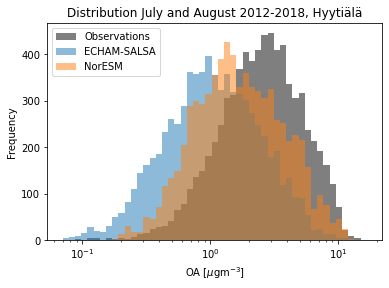

In [177]:
df_OA_all['Obs'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
for mo in models:
    df_OA_all[mo].plot.hist(bins=bins_, alpha=0.5, 
                                     #color=None,
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

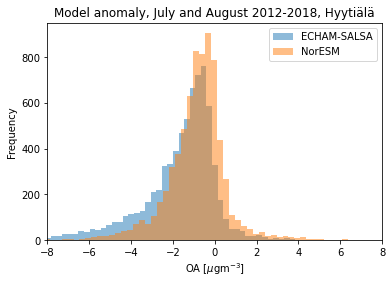

In [178]:
for mo in models:
    (df_OA_all[mo]-df_OA_all['Obs']).plot.hist(#bins=bins_, 
        alpha=0.5, 
        bins=70,
                                     #color=None,
                                     label=mo
                                    )
#plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')
plt.xlim([-8,8])
plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Model anomaly, July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('diff_hist','hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [179]:
import numpy as np

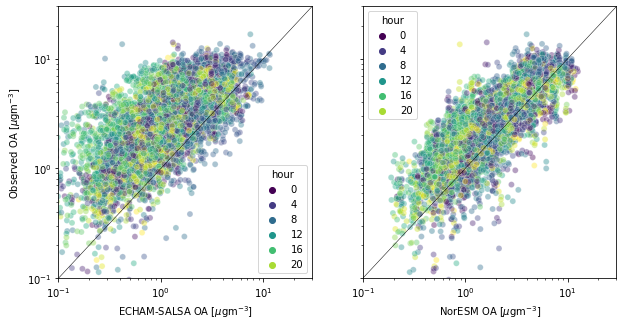

In [185]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[10,5], sharex=True)
ax = axs[0]
_df = df_OA_all
_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.scatterplot(x=mo, y='Obs',#orbins=bins_, alpha=0.5, 
                                     hue='hour', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _df)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([0.1,30])
    ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{mo} OA '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel('Observed OA [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

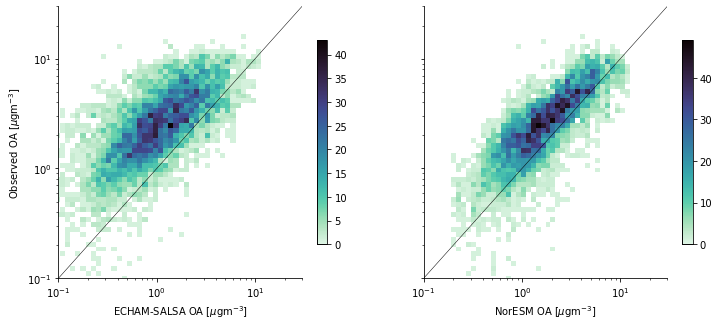

In [188]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5], sharex=True)
ax = axs[0]
_df = df_OA_all
_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.histplot(x=mo, y='Obs',#orbins=bins_, alpha=0.5, 
                                    # hue='hour', 
                #col = 'dir',
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                     cbar=True, cbar_kws=dict(shrink=.75),
                
                edgecolors=None,
                 
                data = _df)


    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([0.1,30])
    ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{mo} OA '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel('Observed OA [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt')
sns.despine(fig)
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [181]:
df_OA_all.T-df_OA_all['Obs']

time,2012-07-01 03:00:00,2012-07-01 04:00:00,2012-07-01 05:00:00,2012-07-01 06:00:00,2012-07-01 07:00:00,2012-07-01 08:00:00,2012-07-01 09:00:00,2012-07-01 10:00:00,2012-07-01 11:00:00,2012-07-01 12:00:00,...,2018-08-31 13:00:00,2018-08-31 14:00:00,2018-08-31 15:00:00,2018-08-31 16:00:00,2018-08-31 17:00:00,2018-08-31 18:00:00,2018-08-31 19:00:00,2018-08-31 20:00:00,2018-08-31 21:00:00,2018-08-31 23:00:00
Obs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ECHAM-SALSA,-0.860729,-0.431804,-0.432293,-0.395684,-0.592721,-0.466489,-1.271302,-1.766579,-2.146687,-1.366977,...,-0.427442,-1.148374,-1.252254,-0.959629,-0.833970,-0.915457,-1.385843,-1.499033,-1.325180,-1.874255
NorESM,-0.459022,-0.192436,-0.151331,-1.010152,-0.357724,-0.166278,-1.267120,-2.006274,-2.727907,-2.072548,...,0.971085,0.261452,0.172463,0.536725,0.650732,0.586568,0.170220,0.149942,0.521846,0.229156
hour,-1.110489,0.112762,1.182154,2.368574,3.341229,4.721066,5.281344,6.136695,6.935266,8.908257,...,11.463410,11.816996,12.777855,14.141378,15.254490,16.154195,16.633179,17.485375,18.671874,20.205844


In [182]:
_diff = (df_OA_all.drop(['hour','Obs'],axis=1).T - df_OA_all['Obs']).T

df_OA_incDiff = df_OA_all.copy()

for mo in _diff.columns:
    df_OA_incDiff[f'{mo}_diff'] = _diff[mo]

In [183]:
df_OA_incDiff

,Obs,ECHAM-SALSA,NorESM,hour,ECHAM-SALSA_diff,NorESM_diff
time,,,,,,
2012-07-01 03:00:00,4.110489,3.249759,3.651467,3,-0.860729,-0.459022
2012-07-01 04:00:00,3.887238,3.455433,3.694801,4,-0.431804,-0.192436
2012-07-01 05:00:00,3.817846,3.385553,3.666515,5,-0.432293,-0.151331
2012-07-01 06:00:00,3.631426,3.235741,2.621274,6,-0.395684,-1.010152
2012-07-01 07:00:00,3.658771,3.066050,3.301047,7,-0.592721,-0.357724
...,...,...,...,...,...,...
2018-08-31 18:00:00,1.845805,0.930347,2.432373,18,-0.915457,0.586568
2018-08-31 19:00:00,2.366821,0.980978,2.537041,19,-1.385843,0.170220
2018-08-31 20:00:00,2.514625,1.015592,2.664567,20,-1.499033,0.149942


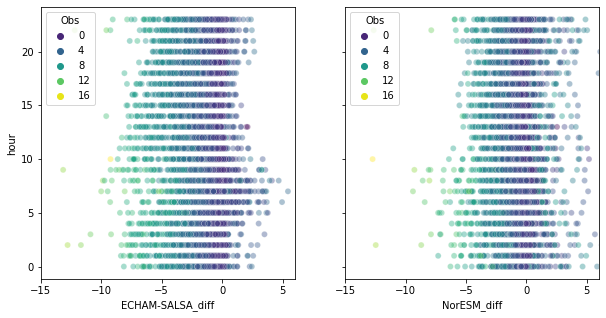

In [184]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[10,5])
ax = axs[0]
_df = df_OA_incDiff
_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.scatterplot(x=f'{mo}_diff', y=f'hour',#orbins=bins_, alpha=0.5, 
                                     hue=f'Obs', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _df)

    #ax.set_yscale('log')
    # ax.set_xscale('symlog')
    ax.set_xlim([-15,6])
    #ax.set_ylim([0.1,30])

    #ax.set_xlabel(f'{mo} OA '+'[$\mu$gm$^{-3}$]')
    #ax.set_ylabel('Observed OA [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    #ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)